In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [37]:
plt.rcParams.update({'font.size': 10})
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({
    "text.usetex": True,
})

In [38]:
def simulation(omega, gamma, b, bm, x0, x0m, delta_t, ref, alpha, N):
    x = x0
    xdot = 0
    xm = x0m
    xdotm = 0
    xs = np.zeros(N)
    xms = np.zeros(N)
    theta = 1
    thetas = np.zeros(N)
    us = np.zeros(N)
    for i in range(N):
        if i < N/2+(N/10):
            uc = -1*xdot+2*ref[i]
        else:
            uc = -1*xdot
        us[i] = uc
        thetas[i] = theta
        xddot = -(omega**2)*x-gamma*xdot + b*theta*uc
        xdot = xdot + xddot*delta_t
        x = x + xdot*delta_t
        xddotm = -(omega**2)*xm-gamma*xdotm + bm*uc
        xdotm = xdotm + xddotm*delta_t
        xm = xm + xdotm*delta_t
        theta= theta+delta_t*(-alpha*xm*(x-xm))
        xs[i] = x
        xms[i] = xm
    return xs, xms, us, thetas

In [71]:
t = np.linspace(0, 400, 5000)
ref = signal.square(2 * np.pi * 0.05 * t)
ref = 0.5*(1+ref)
ref = ref
xs, xms, us, thetas = simulation(2*np.pi*0.1, 0.1, 0.3, 0.5, 5, 10, np.diff(t)[0], ref, 0.01, t.shape[0])

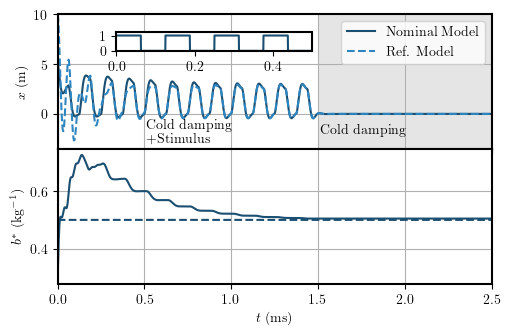

In [138]:



colors = ['#2E86C1', '#85C1E9', '#1B4F72']

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
factor = 0.7
fig.set_size_inches(8*factor, 5*factor, forward=True)
t = np.linspace(0, 200*(1/80e3), 5000)
#ax1.plot(t/1e-3, new_states[:,0]*env.zp_x/1e-9, color=colors[2])
ax1.set_xlim([0, t.max()/1e-3])

#ax1.plot(t/1e-3, ref/ref.max())
ax1.plot(t/1e-3, xs, color=colors[2])
ax1.plot(t/1e-3, xms, color=colors[0], linestyle='dashed')
ax1.set_ylabel(r'$x$ (m)')
ax1.axvspan(t[3000]/1e-3, t[-1]/1e-3, facecolor='0.2', alpha=0.125, zorder=-100)
ax1.text(.51, -2.9, 'Cold damping\n+Stimulus', fontsize=10)
ax1.text(1.51, -2, 'Cold damping', fontsize=10)
ax1.grid(True, which="both", ls="-")
ax1.set_ylim([-3.5, 10])
ax1.legend(['Nominal Model', 'Ref. Model'])



ax2.plot(t/1e-3, thetas*0.3, color=colors[2])
ax2.plot(t/1e-3, np.ones(t.shape)*0.5, color=colors[2], linestyle='dashed')
ax2.grid(True, which="both", ls="-")
ax2.set_ylabel(r'$b^\ast$ (kg${}^{-1}$)')
ax2.set_xlabel(r'$t$ (ms)')

left, bottom, width, height = [0.23, 0.775, 0.35, (0.75/5)*0.35]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.plot(t[:1000]/1e-3, ref[:1000], color=colors[2])

ax3.set_ylim([0,1.2])
ax3.set_xlim([0,0.5])

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('../../plots/Chapter 6/MRAS.pdf', dpi=300, bbox_inches = 'tight')
plt.show()